In [85]:
import numpy as np
def updated_posterior(alpha,beta ,data):

    pass


def create_n_observations(n, lamb):
    """
    Generate n observations per day of a certain disease given by a Poisson distribution.
    
    Parameters:
    n (int): Number of observations per day.
    lam (float): Rate parameter (lambda) of the Poisson distribution.
    
    Returns:
    np.ndarray: Array of n integer observations.
    """
    observations = np.random.poisson(lamb, n)
    return observations

lamb=10
n=400000
data=create_n_observations(n, lamb)


In [86]:
alpha=2
beta=2

In [ ]:
def updated_posterior(alpha, beta, data):
    """
    Calculate the updated posterior parameters for lambda given data and prior parameters alpha and beta.
    
    Parameters:
    alpha (float): Prior shape parameter (alpha) of the Gamma distribution.
    beta (float): Prior rate parameter (beta) of the Gamma distribution.
    data (np.ndarray): Array of observed data points.
    
    Returns:
    tuple: Updated posterior parameters (alpha', beta').
    """
    alpha_prime = alpha + np.sum(data)
    beta_prime = beta + len(data)
    return alpha_prime,beta_prime

# Example usage
alpha_prime,beta_prime = updated_posterior(alpha, beta, data)
print(f"Updated lambda: {alpha_prime / beta_prime:.2f}")

Updated lambda: 10.00


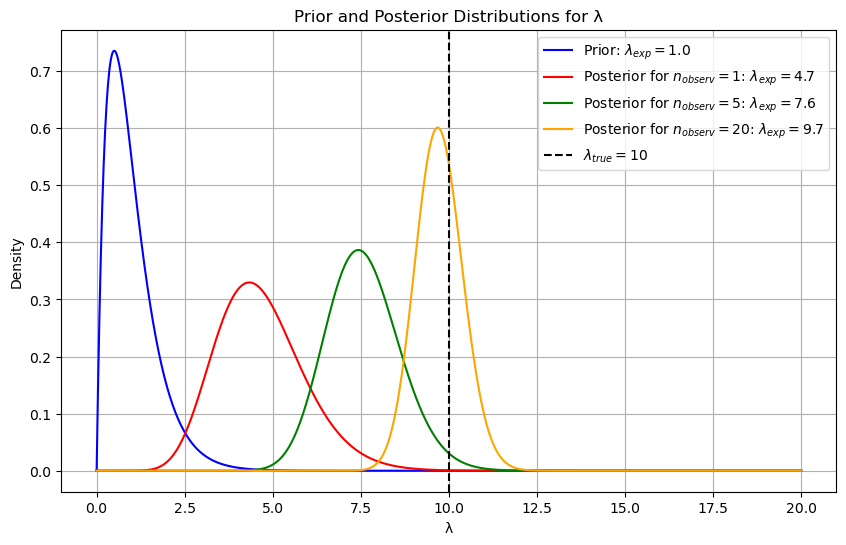

In [88]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

# Generate a range of lambda values
lambda_values = np.linspace(0, 20, 1000)

# Plot the prior distribution
prior_pdf = gamma.pdf(lambda_values, alpha, scale=1/beta)
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, prior_pdf, label=f'Prior: $\\lambda_{{exp}}={alpha/beta:.1f}$', color='blue')

# Plot the posterior distributions for different n
n_values = [1, 5, 20]
colors = ['red', 'green', 'orange', 'purple']
for i, n in enumerate(n_values):
    dobservations = data[:n]
    alpha_prime, beta_prime = updated_posterior(alpha, beta, dobservations)
    posterior_pdf = gamma.pdf(lambda_values, alpha_prime, scale=1/beta_prime)
    plt.plot(lambda_values, posterior_pdf, label=f'Posterior for $n_{{observ}}={n}$: $\\lambda_{{exp}}={alpha_prime/beta_prime:.1f}$', color=colors[i])

# Add a vertical line for the true lambda value
plt.axvline(x=lamb, color='k', linestyle='--', label=fr'$\lambda_{{true}}={lamb}$')

# Add labels and legend
plt.xlabel('λ')
plt.ylabel('Density')
plt.title('Prior and Posterior Distributions for λ')
plt.legend()
plt.grid(True)
plt.show()

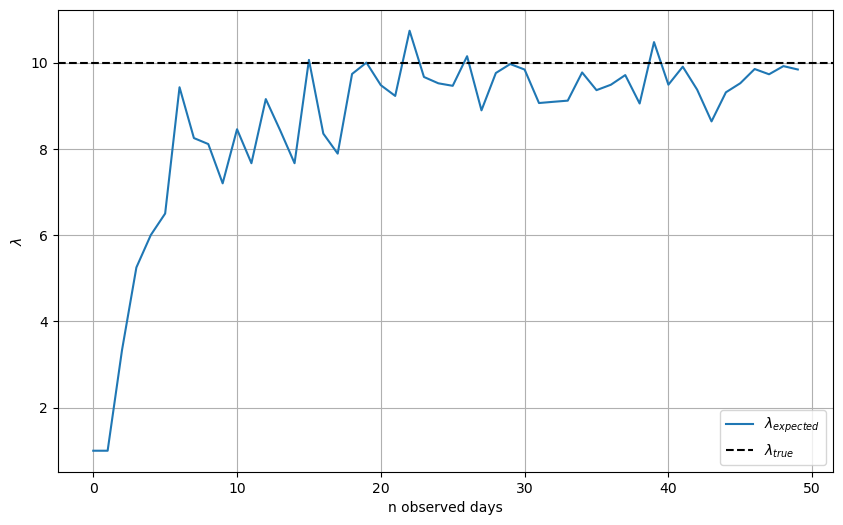

In [89]:





# Generate a range of lambda values
n_samples = np.arange(0, 50)
# Calculate the prior and posterior PDFs
#prior_pdf = gamma.pdf(n_samples, alpha, scale=1/beta)
#posterior_pdf = gamma.pdf(n_samples, alpha_prime, scale=1/beta_prime)
lambda_values_over_n= np.zeros(len(n_samples))
for n in n_samples:
    dobservations=data[:n]
    data = create_n_observations(n, lamb)
    alpha_prime, beta_prime = updated_posterior(alpha, beta, dobservations)
    lambda_values_over_n[n] = alpha_prime/beta_prime
# Plot the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(n_samples, lambda_values_over_n,label=r'$\lambda_{expected}$')
plt.axhline(y=lamb, color='k', linestyle='--', label=r'$\lambda_{true}$')

#plt.plot(lambda_values, posterior_pdf, label=f'Posterior: α\'={alpha_prime}, β\'={beta_prime}', color='red')
plt.xlabel('n observed days')
plt.ylabel(r'$\lambda$')
plt.legend()
plt.grid(True)
plt.show()
